# Background

Found an article that did some analysis on Donald Trump's tweets. The hypothesis was that every hyperbolic tweet was from iPhone (from Trump himself), while every non-hyperbolic tweet was from Android (Trump's aides). 

The analysis in the article was done in R. I thought it might be good to replicate the analysis in Python -- get my hands dirty with web apis, but also do some cool text analysis. http://varianceexplained.org/r/trump-tweets/



In [1]:
# authenticate twitter api

import tweepy

consumer_key = 'uolMmoIeFn15iaX7wiojNcxFS'
consumer_secret = '6aAV1NEKImbNUW6wkI3gI9N5LrifsyMhk9olHM8Pdctebk8X9K'
oauth_token = '29101986-psTTzghyPLSbhDlwq5NJ0RrYn6yNY8smyFo9dkpxX'
oauth_secret = 'HYRq55lgwmtnG0MFE4gsqwKr2bMtyM2YxFEhAUWujOG2b'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(oauth_token, oauth_secret)
api = tweepy.API(auth)
print api

In [2]:
# test that authentication worked

world_woe = 1
us_woe = 23424977

world_trends = api.trends_place(world_woe)
us_trends = api.trends_place(us_woe)
print us_trends

[{u'created_at': u'2016-08-16T05:27:37Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23OneWordOffMovieQuotes', u'query': u'%23OneWordOffMovieQuotes', u'tweet_volume': 22154, u'name': u'#OneWordOffMovieQuotes', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23AYTO', u'query': u'%23AYTO', u'tweet_volume': 35505, u'name': u'#AYTO', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23BachelorInParadise', u'query': u'%23BachelorInParadise', u'tweet_volume': 45572, u'name': u'#BachelorInParadise', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%22Allyson+Felix%22', u'query': u'%22Allyson+Felix%22', u'tweet_volume': 48689, u'name': u'Allyson Felix', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23LHHH', u'query': u'%23LHHH', u'tweet_volume': 80629, u'name': u'#LHHH', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23RHOC', u'query': u'%23RHOC', u'tweet_volume': 12346, u'name': u'#RHOC

In [3]:
# get donald trump's tweets.

username = "realDonaldTrump"
trump_tweets = api.user_timeline(username, count = 3000)

In [4]:
tweets = []

for tweet in trump_tweets:
    tweets.append([tweet.id, tweet.text.encode('utf-8'), tweet.source, tweet.created_at])

In [5]:
# convert our list of lists into a pandas data frame.

import pandas as pd

tweets_df = pd.DataFrame(tweets)

In [6]:
tweets_df.columns = ['id', 'tweets', 'source','created_at']
tweets_df.head()

# preview our data frame.

,id,tweets,source,created_at
0,765284051938926592,#AmericasMerkel https://t.co/QFRs4bEUC1,Twitter for iPhone,2016-08-15 20:28:30
1,765283490887790592,"""CLINTON REFUGEE PLAN COULD BRING IN 620,000 R...",Twitter for iPhone,2016-08-15 20:26:17
2,765269114973720576,#MakeAmericaSafeAgain \nhttps://t.co/bgBGPaKaqI,Twitter for iPhone,2016-08-15 19:29:09
3,764998650598686721,Certain Republicans who have lost to me would ...,Twitter for Android,2016-08-15 01:34:25
4,764976828914237440,"""Stay on message"" is the chant. I always do - ...",Twitter for Android,2016-08-15 00:07:43


In [56]:
# let's plot his tweets by dividing by android and iphone.
source_df = tweets_df.iloc[:, [2,3]]
source_df.head()


source_iphone = source_df.loc[source_df['source'] == "Twitter for iPhone"]
source_android = source_df.loc[source_df['source'] == "Twitter for Android"]


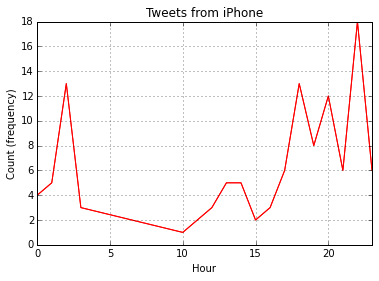

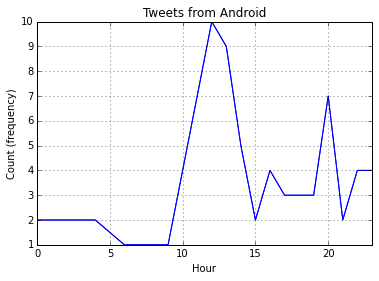

In [72]:
% matplotlib inline
import matplotlib.pyplot as plt

source_iphone.groupby(source_iphone.created_at.dt.hour).count().plot(kind="line", color = "r", label = "iPhone")
plt.legend().set_visible(False)
plt.title("Tweets from iPhone")
plt.xlabel("Hour")
plt.ylabel("Count (frequency)")


source_android.groupby(source_android.created_at.dt.hour).count().plot(kind="line", color = "b", label = "Android")
plt.legend().set_visible(False)
plt.title("Tweets from Android")
plt.xlabel("Hour")
plt.ylabel("Count (frequency)")

plt.show()


The above plots are interesting -- they suggest that Trump tweets mostly early morning and late at night, while his aides take over during midday. 

In [97]:
# before looking more at iphone/android breakdown, I want to analyze trump's tweets as a whole. 

tweet_text = [tweet.text.encode('utf-8').split() for tweet in trump_tweets]

# flatten to remove list of lists.
tweet_text = sum(tweet_text, [])

# downcase everything
tweet_text = [word.lower() for word in tweet_text]

print tweet_text

['#americasmerkel', 'https://t.co/qfrs4beuc1', '"clinton', 'refugee', 'plan', 'could', 'bring', 'in', '620,000', 'refugees', 'in', 'first', 'term', 'at', 'lifetime', 'cost', 'of', 'over', '$400', 'billion."', 'https://t.co/cozqnt6kvs', '#makeamericasafeagain', 'https://t.co/bgbgpakaqi', 'certain', 'republicans', 'who', 'have', 'lost', 'to', 'me', 'would', 'rather', 'save', 'face', 'by', 'fighting', 'me', 'than', 'see', 'the', 'u.s.supreme', 'court', 'get', 'proper', 'appointments.', 'sad!', '"stay', 'on', 'message"', 'is', 'the', 'chant.', 'i', 'always', 'do', '-', 'trade,', 'jobs,', 'military,', 'vets,', '2nd', 'a,', 'repeal', 'ocare,', 'borders,', 'etc', '-', 'but', 'media', 'misrepresents!', 'i', 'have', 'always', 'been', 'the', 'same', 'person-remain', 'true', 'to', 'self.the', 'media', 'wants', 'me', 'to', 'change', 'but', 'it', 'would', 'be', 'very', 'dishonest', 'to', 'supporters', 'to', 'do', 'so!', 'it', 'is', 'not', '"freedom', 'of', 'the', 'press"', 'when', 'newspapers', 'an

In [99]:
# get the most common occurrences
from collections import Counter
count = Counter(tweet_text)
count.most_common(10)


[('the', 111),
 ('to', 65),
 ('and', 61),
 ('in', 60),
 ('is', 48),
 ('i', 48),
 ('you', 42),
 ('of', 39),
 ('thank', 37),
 ('will', 36)]

In [105]:
# get a list of stopwords

from nltk.corpus import stopwords
import string

punctuation = list(string.punctuation)
stop_words = stopwords.words('english') + punctuation + ['rt']


In [106]:
# convert unicode

stop_words = [word.encode('utf-8') for word in stop_words]
stop_words = [word.lower() for word in stop_words]
print stop_words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [107]:
tweet_stop = [word for word in tweet_text if word not in stop_words]
print tweet_stop

['#americasmerkel', 'https://t.co/qfrs4beuc1', '"clinton', 'refugee', 'plan', 'could', 'bring', '620,000', 'refugees', 'first', 'term', 'lifetime', 'cost', '$400', 'billion."', 'https://t.co/cozqnt6kvs', '#makeamericasafeagain', 'https://t.co/bgbgpakaqi', 'certain', 'republicans', 'lost', 'would', 'rather', 'save', 'face', 'fighting', 'see', 'u.s.supreme', 'court', 'get', 'proper', 'appointments.', 'sad!', '"stay', 'message"', 'chant.', 'always', 'trade,', 'jobs,', 'military,', 'vets,', '2nd', 'a,', 'repeal', 'ocare,', 'borders,', 'etc', 'media', 'misrepresents!', 'always', 'person-remain', 'true', 'self.the', 'media', 'wants', 'change', 'would', 'dishonest', 'supporters', 'so!', '"freedom', 'press"', 'newspapers', 'others', 'allowed', 'say', 'write', 'whatever', 'want', 'even', 'completely', 'false!', 'fighting', 'crooked', 'hillary,', 'fighting', 'dishonest', 'corrupt', 'media', 'government', 'protection', 'process.', 'people', 'get', 'it!', 'crooked', 'hillary', 'clinton', 'protecte

In [110]:
from collections import Counter
count = Counter(tweet_stop)
frequencies = count.most_common(30)
print frequencies

[('thank', 37), ('hillary', 32), ('crooked', 21), ('media', 21), ('clinton', 17), ('people', 16), ('&amp;', 16), ('great', 14), ('#maga', 13), ('join', 10), ('get', 10), ('#makeamericagreatagain', 10), ('never', 9), ('would', 9), ('#trumppence16', 8), ('cnn', 8), ('you!', 8), ('tonight', 7), ('#crookedhillary', 7), ('dishonest', 7), ('made', 7), ('want', 6), ('president', 6), ('colorado', 6), ('@cnn', 6), ('saying', 6), ('see', 6), ('last', 6), ('failing', 6), ('much', 6)]


After accounting for stopwords, here are Trump's most commonly used words. Not very surprising. 

Let's visualize it.

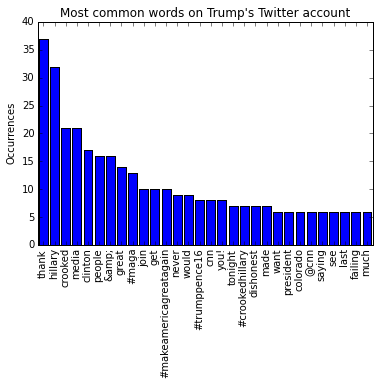

In [157]:
words = []
occurrences = []

for freq in frequencies:
    words.append(freq[0])
    occurrences.append(freq[1])
    
xaxis = [i + 0.1 for i, _ in enumerate(words)]

plt.bar(xaxis, occurrences)
plt.ylabel("Occurrences")
plt.title("Most common words on Trump's Twitter account")

plt.xticks([i + 0.5 for i, _ in enumerate(words)], words, rotation = 'vertical')
           
plt.show()

Let's now partition the dataset by Android and iPhone use, and then recompute the most common occurrences. 


In [172]:
# get all the iPhone tweets
tweet_iphone = [tweet.text.encode('utf-8').split() for tweet in trump_tweets if tweet.source == 'Twitter for iPhone']

# get all the Android tweets
tweet_android = [tweet.text.encode('utf-8').split() for tweet in trump_tweets if tweet.source == 'Twitter for Android']


# flatten to remove list of lists.
tweet_iphone = sum(tweet_iphone, [])
tweet_android = sum(tweet_android, [])

# downcase everything
tweet_iphone = [word.lower() for word in tweet_iphone]
tweet_android = [word.lower() for word in tweet_android]




In [173]:
# remove stop words

tweet_iphone = [word for word in tweet_iphone if word not in stop_words]
tweet_android = [word for word in tweet_android if word not in stop_words]


In [188]:
# recompute the most common words.

from collections import Counter
count = Counter(tweet_iphone)
freq_iphone = count.most_common(30)
print freq_iphone

from collections import Counter
count = Counter(tweet_android)
freq_android = count.most_common(30)
print freq_android

[('thank', 29), ('&amp;', 15), ('hillary', 13), ('#maga', 12), ('join', 10), ('great', 9), ('clinton', 9), ('cnn', 8), ('#makeamericagreatagain', 8), ('tonight', 7), ('#crookedhillary', 7), ('people', 6), ('colorado', 6), ('you!', 6), ('daytona', 5), ('#trumppence16', 5), ('#imwithyou', 5), ('#makeamericagreatagain!', 4), ('get', 4), ('crooked', 4), ('enjoy!', 4), ('@mike_pence', 4), ('virginia!', 4), ('back', 4), ('support', 4), ('trump', 3), ('united', 3), ('amazing', 3), ('president', 3), ('soon.', 3)]
[('hillary', 18), ('media', 18), ('crooked', 17), ('people', 9), ('never', 7), ('dishonest', 7), ('clinton', 7), ('get', 6), ('would', 6), ('great', 5), ('thank', 5), ('@realdonaldtrump', 5), ('made', 5), ('@nytimes', 4), ('want', 4), ('@cnn', 4), ('saying', 4), ('said', 4), ('speech', 4), ('running', 4), ('failing', 4), ('mr.', 4), ('like', 4), ('me,', 3), ('biased', 3), ('love', 3), ('two', 3), ("didn't", 3), ('allowed', 3), ('plane', 3)]


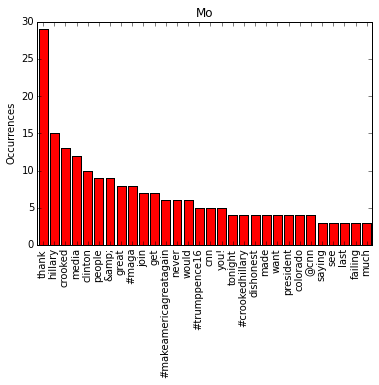

In [189]:
words_iphone = []
occurrences_iphone = []

for freq in freq_iphone:
    words_iphone.append(freq[0])
    occurrences_iphone.append(freq[1])

xaxis = [i + 0.1 for i, _ in enumerate(words_iphone)]

plt.bar(xaxis, occurrences_iphone, color = "r")
plt.ylabel("Occurrences")
plt.title("Mo")

plt.xticks([i + 0.5 for i, _ in enumerate(words_iphone)], words, rotation = 'vertical')
           
plt.show()


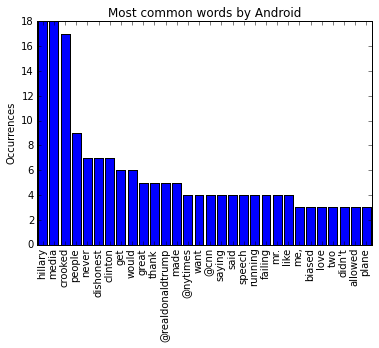

In [190]:
words_android = []
occurrences_android = []

for freq in freq_android:
    words_android.append(freq[0])
    occurrences_android.append(freq[1])
    
xaxis = [i + 0.1 for i, _ in enumerate(words_android)]

plt.bar(xaxis, occurrences_android)
plt.ylabel("Occurrences")
plt.title("Most common words by Android")

plt.xticks([i + 0.5 for i, _ in enumerate(words_android)], words_android, rotation = 'vertical')
           
plt.show()

Interestingly, iPhone seems to be a tad more grateful -- "thank" is the most occurring word. Also, notably, "tonight" is a common occurrence. 

Android, on the other